# Logistic regression 

In [1]:
import numpy as np
import pandas as pd

import scipy
from scipy.stats import spearmanr


import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing



# Logistic regression on mtcars dataset

In [2]:
cars = pd.read_csv('C:\\Users\\edink\\Desktop\\IIS 2018-19\\W6\\Vjezbe\\mtcars.csv')
cars.columns=['car name', "mpg","cyl","disp","hp","drat","wt","qsec","vs","am","gear","carb"] #može ' i "
cars.head()

,car name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
cars_data = cars.iloc[:,[5,11]].values
cars_data_names = ('drat','carb')                     
y = cars.iloc[:,9].values

print (cars_data)
print (cars_data_names)
print (y)

[[3.9  4.  ]
 [3.9  4.  ]
 [3.85 1.  ]
 [3.08 1.  ]
 [3.15 2.  ]
 [2.76 1.  ]
 [3.21 4.  ]
 [3.69 2.  ]
 [3.92 2.  ]
 [3.92 4.  ]
 [3.92 4.  ]
 [3.07 3.  ]
 [3.07 3.  ]
 [3.07 3.  ]
 [2.93 4.  ]
 [3.   4.  ]
 [3.23 4.  ]
 [4.08 1.  ]
 [4.93 2.  ]
 [4.22 1.  ]
 [3.7  1.  ]
 [2.76 2.  ]
 [3.15 2.  ]
 [3.73 4.  ]
 [3.08 2.  ]
 [4.08 1.  ]
 [4.43 2.  ]
 [3.77 2.  ]
 [4.22 4.  ]
 [3.62 6.  ]
 [3.54 8.  ]
 [4.11 2.  ]]
('drat', 'carb')
[1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1]


# Checking for independence between features (indepentdent variables - columns)

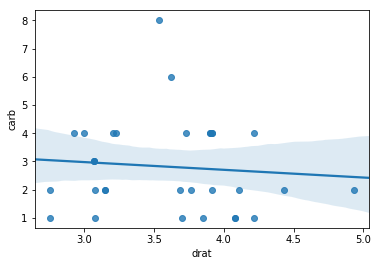

In [4]:
sns.regplot(x='drat', y='carb', data=cars, scatter=True)

In [5]:
drat=cars['drat']
carb=cars['carb']
spearman_r_coeff, p_value = spearmanr(drat, carb)

print ("Spearman r coefficent = {0:6.3f} \np-value for Spearman r coefficent = {1:5.3f}".format(spearman_r_coeff,p_value))

Spearman r coefficent = -0.125 
p-value for Spearman r coefficent = 0.495


# Checking for missing values

In [6]:
cars.isnull().sum()

car name    0
mpg         0
cyl         0
disp        0
hp          0
drat        0
wt          0
qsec        0
vs          0
am          0
gear        0
carb        0
dtype: int64

# Checking that target is binary or ordinal variable 

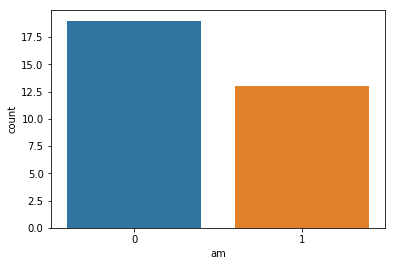

In [7]:
sns.countplot(x='am', data = cars)

# Checking if datasize is sufficient

In [8]:
cars.info() #needed min of 50 observations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
car name    32 non-null object
mpg         32 non-null float64
cyl         32 non-null int64
disp        32 non-null float64
hp          32 non-null int64
drat        32 non-null float64
wt          32 non-null float64
qsec        32 non-null float64
vs          32 non-null int64
am          32 non-null int64
gear        32 non-null int64
carb        32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


# Deploying and evaluating model

In [9]:
X=scale(cars_data)
print (X)

[[ 0.57659448  0.74696708]
 [ 0.57659448  0.74696708]
 [ 0.48158406 -1.14010764]
 [-0.98157639 -1.14010764]
 [-0.84856181 -0.51108274]
 [-1.58964307 -1.14010764]
 [-0.7345493   0.74696708]
 [ 0.17755072 -0.51108274]
 [ 0.61459865 -0.51108274]
 [ 0.61459865  0.74696708]
 [ 0.61459865  0.74696708]
 [-1.00057848  0.11794217]
 [-1.00057848  0.11794217]
 [-1.00057848  0.11794217]
 [-1.26660765  0.74696708]
 [-1.13359306  0.74696708]
 [-0.69654514  0.74696708]
 [ 0.91863199 -1.14010764]
 [ 2.53380911 -0.51108274]
 [ 1.18466116 -1.14010764]
 [ 0.1965528  -1.14010764]
 [-1.58964307 -0.51108274]
 [-0.84856181 -0.51108274]
 [ 0.25355906  0.74696708]
 [-0.98157639 -0.51108274]
 [ 0.91863199 -1.14010764]
 [ 1.58370492 -0.51108274]
 [ 0.32956739 -0.51108274]
 [ 1.18466116  0.74696708]
 [ 0.04453613  2.00501689]
 [-0.10748054  3.26306671]
 [ 0.97563824 -0.51108274]]


In [10]:
LogReg=LogisticRegression()

LogReg.fit (X,y)
print(LogReg.score(X,y))

0.8125


In [11]:
y_pred=LogReg.predict(X)
from sklearn.metrics import classification_report
print (classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.79      0.83        19
          1       0.73      0.85      0.79        13

avg / total       0.82      0.81      0.81        32

